# Multi Linear Regression - Bike Sharing Assignment

## **Importing Necessary Libraries**

In [1]:
# For analysis and numerical functions
import numpy as np
import pandas as pd

# For Vizualization
import matplotlib.pyplot as plt
import seaborn as sns

# Extra
import warnings
warnings.filterwarnings(action='ignore')

## **Dataset Loading**

In [2]:
# Read the csv file using pandas
df = pd.read_csv('day.csv')

In [3]:
# Reading the Dataset
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### cnt is a target variable anmd rest columns are features

## **Data Sanity Checks**

In [4]:
# Checking the total number of Rows and Columns.
df.shape

(730, 16)

#### There are 730 rows and 16 columns in the data set. There are no null values in any of the columns.

In [5]:
# Checking the informations of datasets.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


## **Checking Statistical Describtion**

In [6]:
# Checking the Statistical informations of the dataset.
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# Cleaning Data

## **Drop those columns who are of no use for analysis**

- `instant` is just a row instance identifier.
- `dteday` is removed as we have some of date features like `mnth` and `year` and `weekday` already in other columns and also 
for this analysis we will not consider day to day trend in demand for bikes.
- `casual` and `registered` variables are not available at the time of prediction and also these describe the target variable 
`cnt` in a very trivial way `target = casual + registered`, which leads to data leakage.

In [7]:
# Creating a list to drop no use columns at onces
dropping_cols = ['instant','dteday','casual','registered']
df.drop(dropping_cols, axis=1, inplace=True)

#### Dropping casual column and registered column because it is given in problem statement that 'cnt' column is the combined of both the columns

In [8]:
# Checking Data after dropping columns
df

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,2114
726,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,3095
727,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,1341
728,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,1796


In [9]:
# Checking proportion of missing values in each column
df.isnull().mean()

season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
cnt           0.0
dtype: float64

In [10]:
# Calulating number of unique values in each column
df.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
dtype: int64

In [11]:
# Creating list for categorical, continuous and target column.
cat_cols = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
cont_cols = ['temp','atemp','hum','windspeed']
target = ['cnt']
len(cat_cols)+len(cont_cols)+len(target)

12

## **Uniariate Analysis**

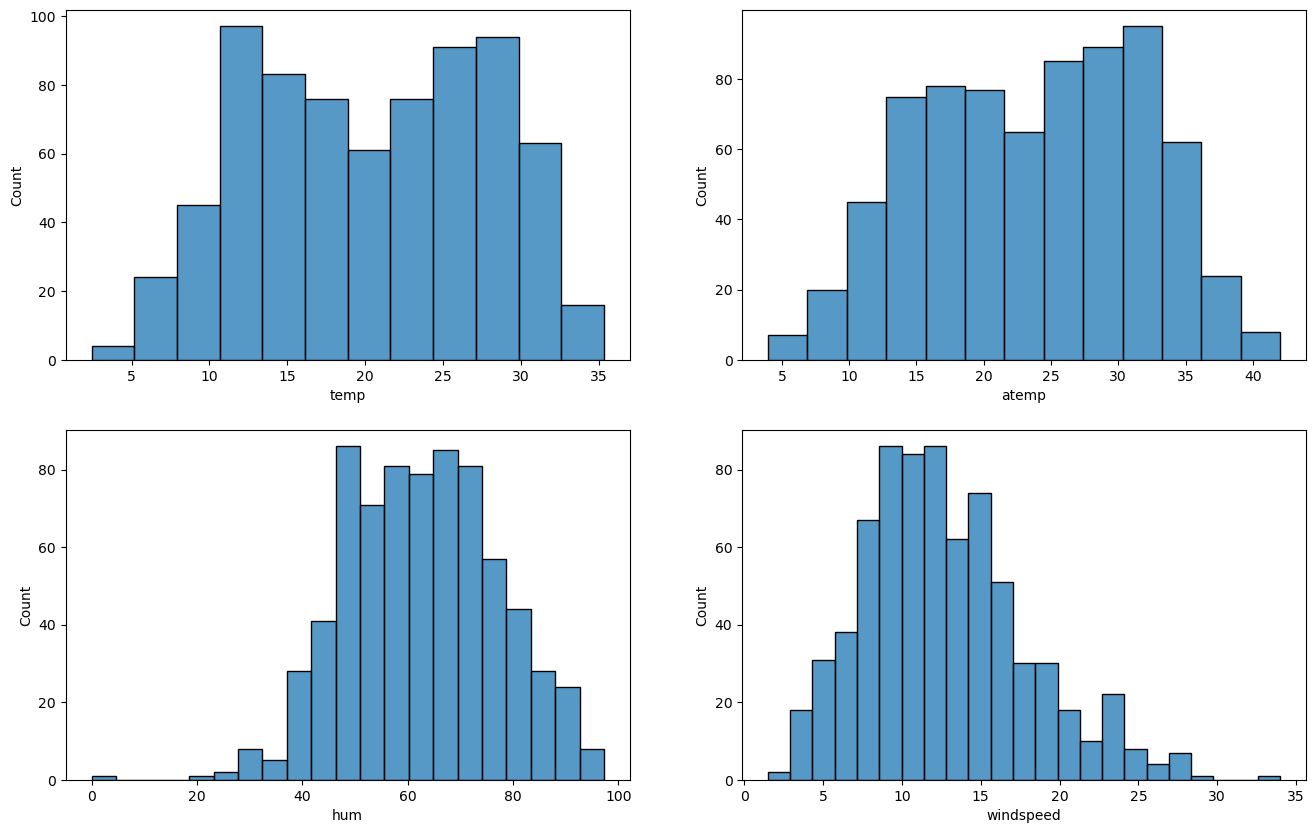

In [12]:
# Print continuous columns graph using countplot
fig, axs = plt.subplots(len(cont_cols) // 2, 2, figsize=(16, 10))
for i in range(len(cont_cols) // 2):
    for j in range(2):
        index = 2 * i + j
        sns.histplot(df[cont_cols[index]], ax=axs[i][j])
plt.show()


### _Insights_:
- According to 'windspeed' people would prefer to travel while windspeed is between 8 to 16 after, that the rented bike graph goes down
- On the basis 'hum' column customer rented bike when humidity is higher than 70
- According to 'temp' graph people prefer to rented bike when temprature is moderate either extreme low nor extreme high
- Based on above insights we can conclude that climate directly control shared bike business.

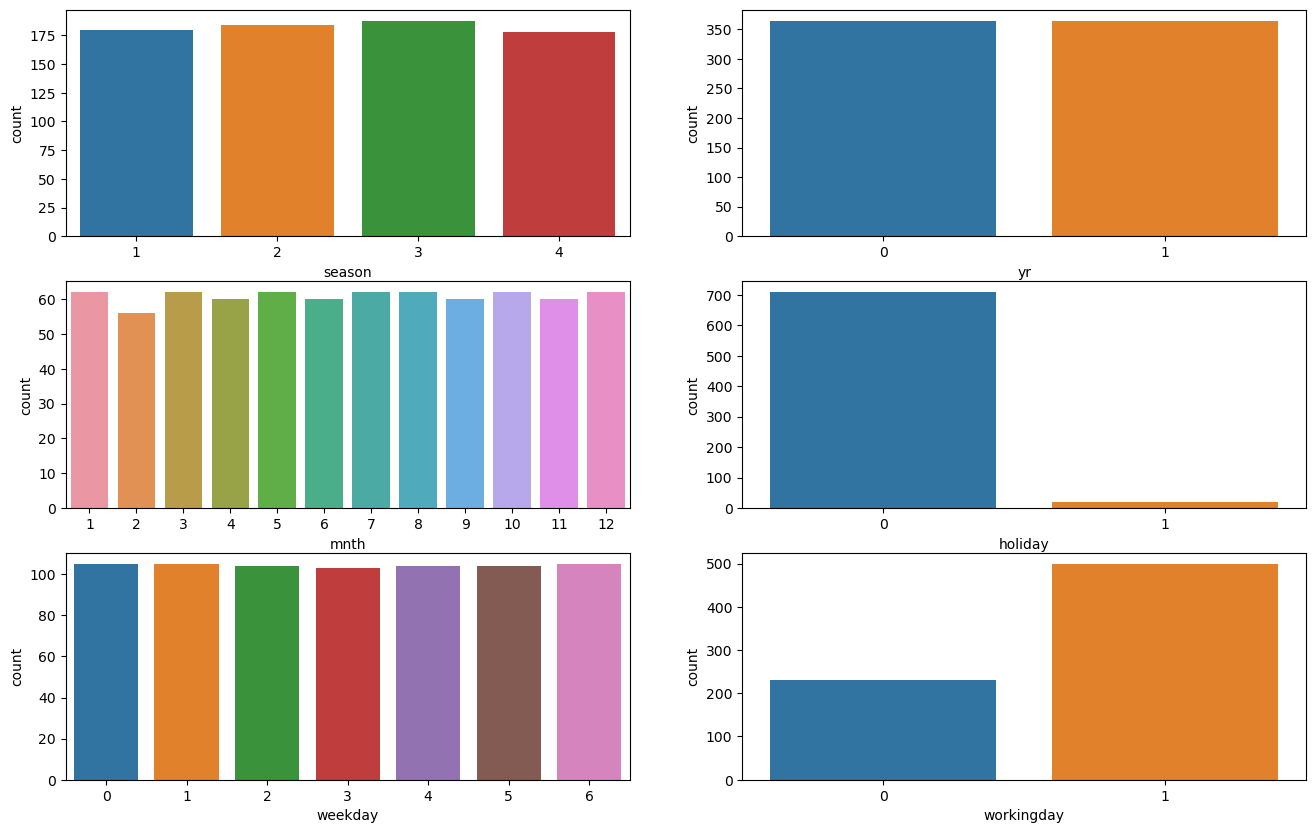

In [13]:
# Print countplot graph for categorical columns
fig, axs = plt.subplots(len(cat_cols) // 2, 2, figsize=(16, 10))
for i in range(len(cat_cols) // 2):
    for j in range(2):
        index = 2 * i + j
        sns.countplot(x=cat_cols[index], data=df, ax=axs[i][j])
plt.show()


## **Biavariate Analysis**

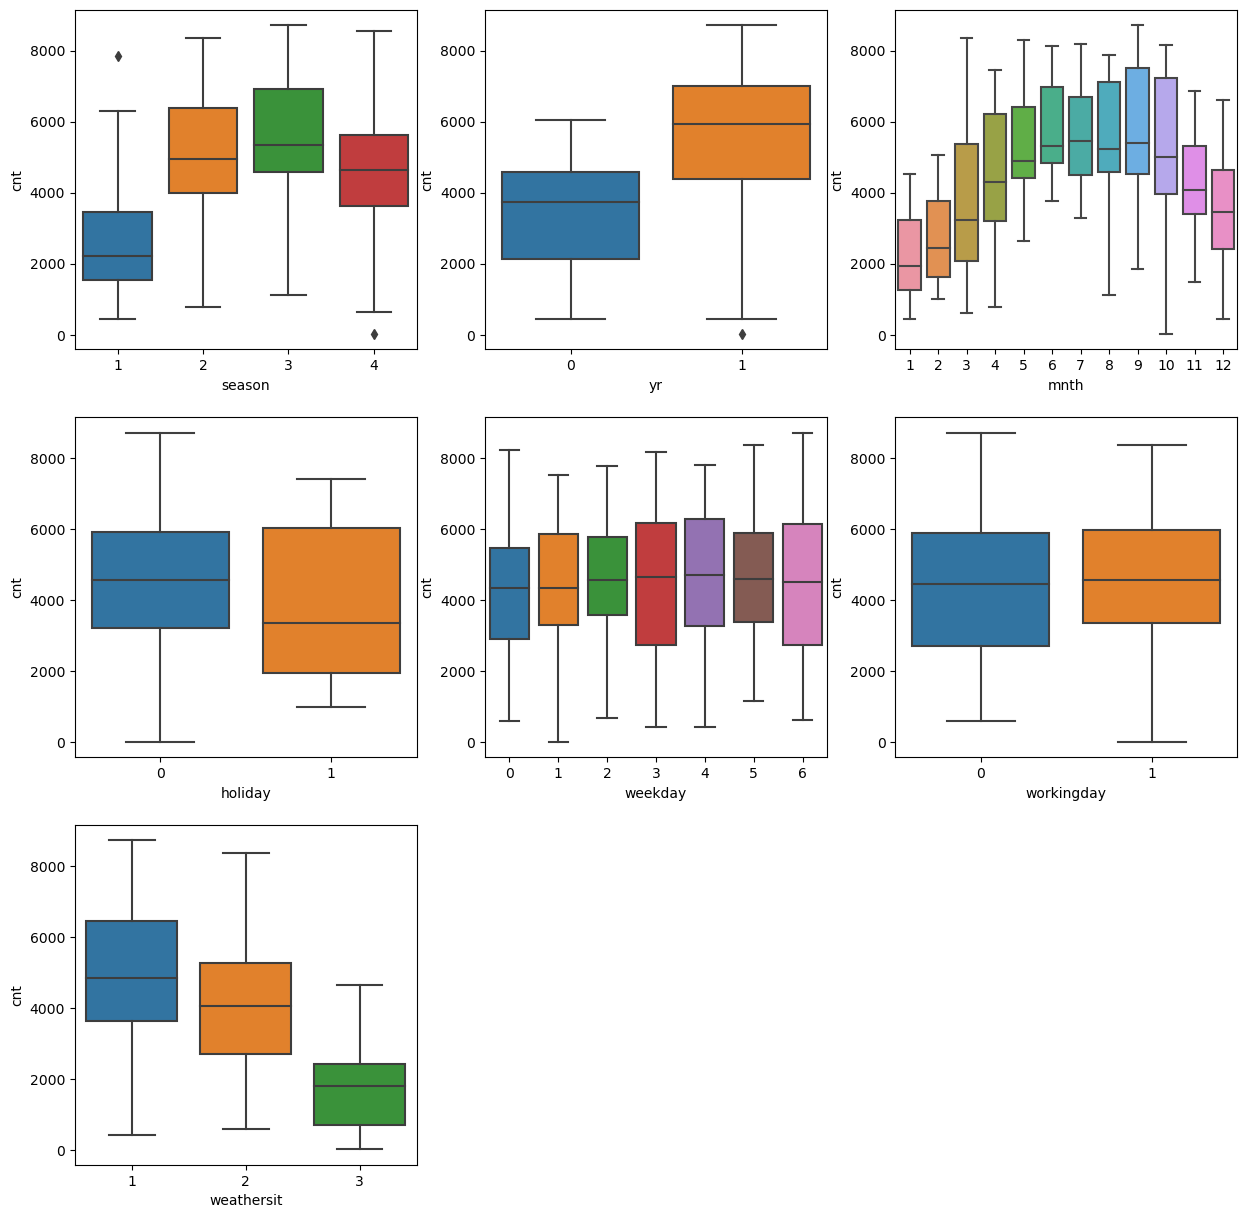

In [14]:
# Boxplot for categorical column
cat_cols = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(15, 15))
for i in enumerate(cat_cols):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=df, x=i[1], y='cnt')
plt.show()

#### _`Inference`_:
    Here are few insights we drawn from the plots

    1. Fall is the most popular season to hire bikes.
    2. I've noticed an increase in demand for next year.
    3. Demand is increasing month after month until mnth_6. The month of saeson_9 has the biggest demand. Demand begins to 
    fall after saeson_9.
    4. When there is a holiday, demand falls.
    5. The weekday does not provide a clear picture of demand.
    6. The clear weathershit is in high demand.
    7. Bike sharing is more popular in season_9. It is lower at both the beginning and the end of the year, which can be           related to bad weather.

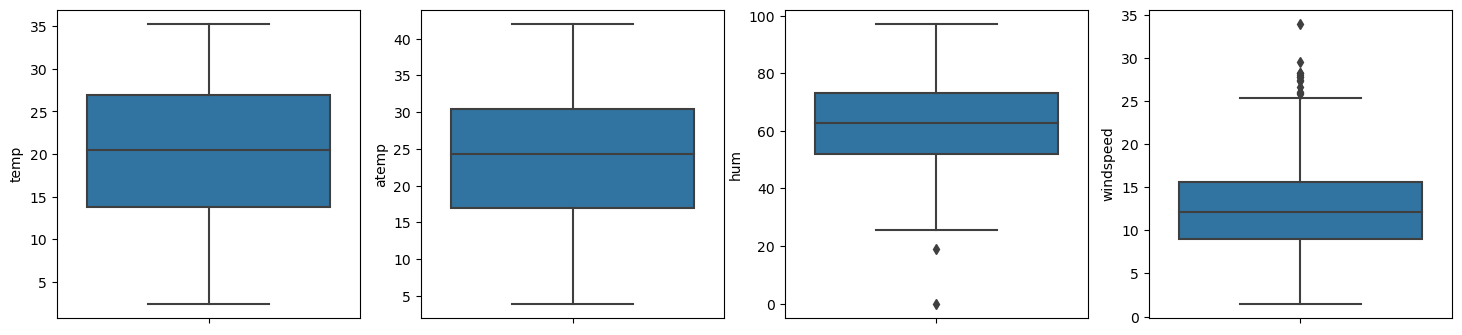

In [15]:
# Draw box plots for indepent variables with continuous values
cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(18,4))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=df)
    i+=1

#### From these plots, we can see there are no outliers to be handled. We are good with not having any outliers in the data set

## Multivariate Analysis

In [16]:
# create new dataframe with only continuous columns
cont_df = df[cont_cols]

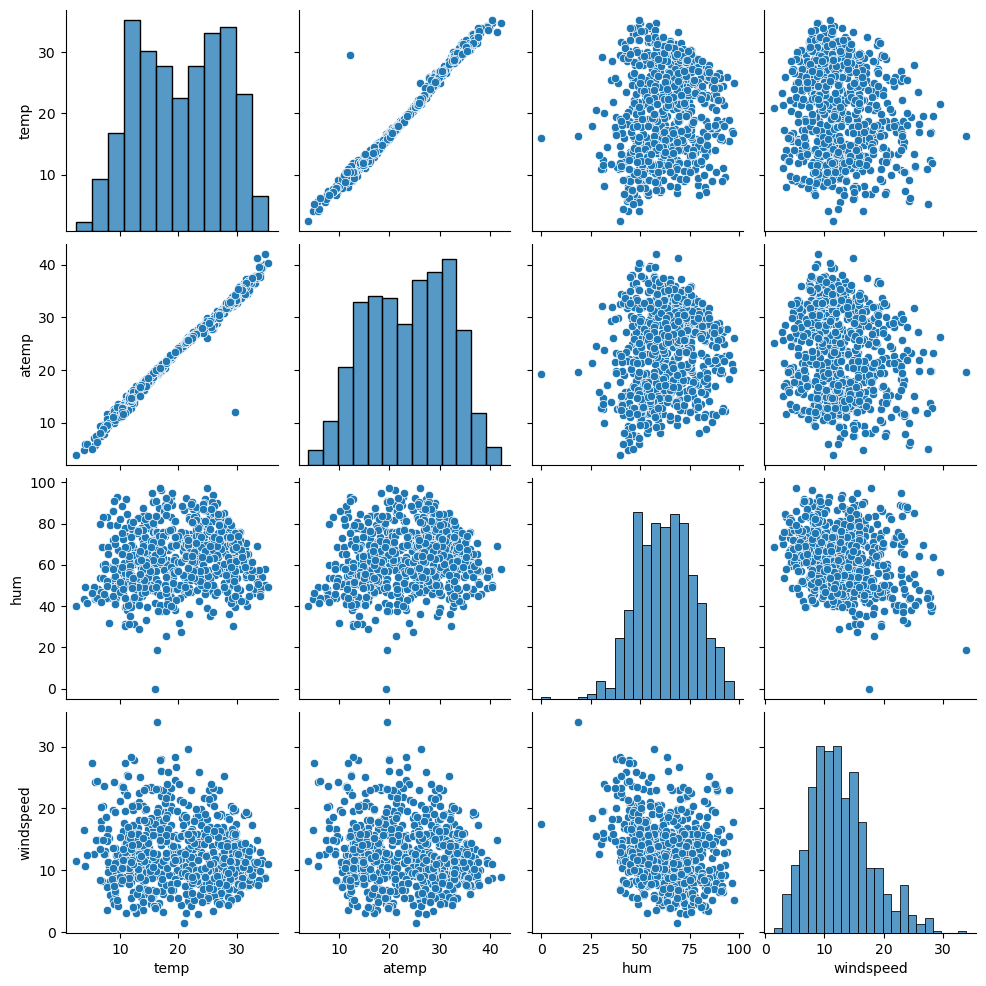

In [17]:
# plot pairplot
sns.pairplot(cont_df)
plt.show()

<AxesSubplot:>

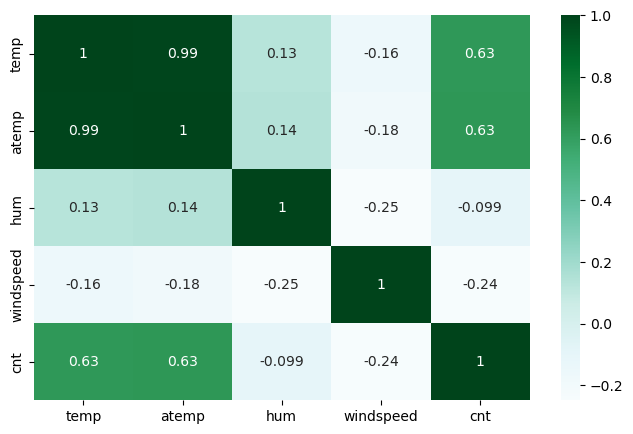

In [18]:
# Checking continuous variables relationship with each other
plt.figure(figsize=(8,5))
sns.heatmap(df[cont_cols+["cnt"]].corr(), cmap='BuGn',annot=True)

## Based on above heatmap we can conclude that:
    1. 'temp' is highly corelated to 'atemp' (already mention in problem statemenyt)
    2. 'cnt' is 63% correlated with 'temp' and 'atemp'

# **Pre - Processing Steps**

### **Dummy Variable Creation**



In [19]:
# Checking no. of unique values of categorical columns
df[cat_cols].nunique()# Only for non binary categorical columns

season         4
yr             2
mnth          12
holiday        2
weekday        7
workingday     2
weathersit     3
dtype: int64

In [20]:
# Creating dummy variable for 'season' column and drop first column
season_dum = pd.get_dummies(df["season"], prefix="season", drop_first=True)
season_dum.head()

,season_2,season_3,season_4
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [21]:
# Creating dummy variable for 'mnth' column and drop first column
mnth_dum=pd.get_dummies(df["mnth"], prefix="mnth", drop_first=True)
mnth_dum.head()

,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12
0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0


In [22]:
# Creating dummy variable for 'weekday' column and drop first column
weekday_dum=pd.get_dummies(df["weekday"], prefix="weekday", drop_first=True)
weekday_dum.head()

,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0,0,0,1
1,0,0,0,0,0,0
2,1,0,0,0,0,0
3,0,1,0,0,0,0
4,0,0,1,0,0,0


In [23]:
# Creating dummy variable for 'weathersit' column and drop first column
weathersit_dum=pd.get_dummies(df["weathersit"], prefix="weathersit", drop_first=True)
weathersit_dum.head()

,weathersit_2,weathersit_3
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


In [24]:
# Combining the result to the dataframe
df1 = pd.concat([season_dum, mnth_dum, weekday_dum, weathersit_dum, df], axis=1)
df1.head()

,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,...,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,0,0,0,0,0,0,0,0,0,0,...,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,0,0,0,0,0,0,0,0,0,0,...,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,0,0,0,0,0,0,0,0,0,0,...,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,0,0,0,0,0,0,0,0,0,0,...,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [25]:
# Print columns after creating dummy variuables 
df1.columns

Index(['season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3', 'season',
       'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp',
       'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [26]:
# Check if the columns exist in the dataframe before dropping them
cols_to_drop = ['season', 'mnth', 'weathersit', 'weekday']

In [27]:
# Creating loop to drop columns
existing_cols = [col for col in cols_to_drop if col in df.columns]
df1.drop(existing_cols, axis=1, inplace=True)

In [28]:
# Again reading data
df1.head()

,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,...,weathersit_2,weathersit_3,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,14.110847,18.18125,80.5833,10.749882,985
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,14.902598,17.68695,69.6087,16.652113,801
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


In [29]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   season_2      730 non-null    uint8  
 1   season_3      730 non-null    uint8  
 2   season_4      730 non-null    uint8  
 3   mnth_2        730 non-null    uint8  
 4   mnth_3        730 non-null    uint8  
 5   mnth_4        730 non-null    uint8  
 6   mnth_5        730 non-null    uint8  
 7   mnth_6        730 non-null    uint8  
 8   mnth_7        730 non-null    uint8  
 9   mnth_8        730 non-null    uint8  
 10  mnth_9        730 non-null    uint8  
 11  mnth_10       730 non-null    uint8  
 12  mnth_11       730 non-null    uint8  
 13  mnth_12       730 non-null    uint8  
 14  weekday_1     730 non-null    uint8  
 15  weekday_2     730 non-null    uint8  
 16  weekday_3     730 non-null    uint8  
 17  weekday_4     730 non-null    uint8  
 18  weekday_5     730 non-null    

In [30]:
# Checking columns again after dropping not necessary columns
df1.columns

Index(['season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3', 'yr',
       'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

## **Train-Test Split**

In [31]:
# Spliting columns into two portion 
X=df1.drop(["cnt"],axis=1)   # X = features 
y=df1["cnt"]   # y = target column

In [32]:
# Spliting data into 4 parts as X_train,X_test,y_train,y_test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)

In [33]:
# Measiring X_train shape
X_train.shape

(511, 29)

In [34]:
# Measiring X_test shape
X_test.shape

(219, 29)

## **Scalling**

In [35]:
#Standardization
#z=x-xmean/sigma
X_train=(X_train-X_train.mean())/X_train.std()

In [36]:
X_test=(X_test-X_test.mean())/X_test.std()

## **Modelling**

### **Feature Selection**

In [37]:
# Building a Lienar Regression model using SKLearn for RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

estimator=LinearRegression()
selector=RFE(estimator,n_features_to_select=15)#15

selector=selector.fit(X_train,y_train)
selector.support_
selector

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [38]:
# Columns selected by RFE
selected_features = list(X_train.columns[selector.support_])
selected_features

['season_2',
 'season_3',
 'season_4',
 'mnth_3',
 'mnth_8',
 'mnth_9',
 'mnth_10',
 'weekday_6',
 'weathersit_2',
 'weathersit_3',
 'yr',
 'workingday',
 'temp',
 'hum',
 'windspeed']

In [39]:
# Assigning changes of selected_feature into X_train and X_test
X_train = X_train[selected_features]
X_test = X_test[selected_features]

In [40]:
# Saving above changes into X_train-sm and X_test_sm
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

In [41]:
# First Model
model1 = sm.OLS(y_train,X_train_sm)
res1 = model1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.4
Date:                Thu, 04 May 2023   Prob (F-statistic):          1.66e-191
Time:                        19:38:25   Log-Likelihood:                -4114.9
No. Observations:                 511   AIC:                             8262.
Df Residuals:                     495   BIC:                             8330.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         4491.3033     34.173    131.430      0.000    4424.162    4558.445
season_2       464.1224     55.751      8.325      0.000     354.584     573.660
season_3       149.9144     85.735      1.749      0.081     -18.535     318.363
season_4       563.0300     52.322     10.761      0.000     460.229     665.831
mnth_3          69.2141     36.961      1.873      0.062      -3.405     141.833
mnth_8         120.6945     44.386      2.719      0.007      33.486     207.903
mnth_9         272.7055     40.396      6.751      0.000     193.336     352.075
mnth_10        112.3184     42.156      2.664      0.008      29.493     195.144
weekday_6      189.1568     43.947      4.304      0.000     102.810     275.503
weathersit_2  -240.1159     42.902     -5.597      0.000    -324.408    -155.824
weathersit_3  -372.5136     38.518     -9.671      0.000    -448.193    -296.834
yr            1003.9270     34.826     28.827      0.000     935.502    1072.352
workingday     210.7202     44.093      4.779      0.000     124.087     297.354
temp           967.3093     65.947     14.668      0.000     837.738    1096.881
hum           -203.0978     47.323     -4.292      0.000    -296.077    -110.119
windspeed     -273.2240     37.467     -7.292      0.000    -346.837    -199.611
==============================================================================
Omnibus:                       86.041   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              229.344
Skew:                          -0.832   Prob(JB):                     1.58e-50
Kurtosis:                       5.829   Cond. No.                         5.38
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
# Checking VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Feature"]=X_train.columns

vif_data["VIF"] = [variance_inflation_factor(X_train.values,i) for i in range(len(X_train.columns))]
vif_data

,Feature,VIF
0,season_2,2.656429
1,season_3,6.282110
2,season_4,2.339727
3,mnth_3,1.167527
4,mnth_8,1.683775
5,mnth_9,1.394690
6,mnth_10,1.518799
7,weekday_6,1.650661
8,weathersit_2,1.573057
9,weathersit_3,1.268022


In [43]:
# Dropping season_3 because it is very closer to p_value 0.05 or (5%).

X_train = X_train_sm.drop(["season_3"],axis=1)
X_test = X_test_sm.drop(["season_3"],axis=1)

In [44]:
# again adding the changes in update in x_data

X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

In [45]:
# Second Model
model2 = sm.OLS(y_train,X_train_sm)
res2 = model2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.6
Date:                Thu, 04 May 2023   Prob (F-statistic):          5.29e-192
Time:                        19:38:25   Log-Likelihood:                -4116.5
No. Observations:                 511   AIC:                             8263.
Df Residuals:                     496   BIC:                             8326.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         4491.3033     34.243    131.158      0.000    4424.023    4558.584
season_2       396.6221     40.308      9.840      0.000     317.427     475.817
season_4       518.6214     45.840     11.314      0.000     428.557     608.686
mnth_3          56.3343     36.294      1.552      0.121     -14.975     127.644
mnth_8         148.6580     41.491      3.583      0.000      67.139     230.177
mnth_9         295.8286     38.250      7.734      0.000     220.677     370.980
mnth_10        102.4396     41.862      2.447      0.015      20.191     184.688
weekday_6      189.1058     44.038      4.294      0.000     102.581     275.631
weathersit_2  -234.8246     42.884     -5.476      0.000    -319.081    -150.568
weathersit_3  -364.7199     38.339     -9.513      0.000    -440.047    -289.393
yr             998.8278     34.776     28.722      0.000     930.502    1067.154
workingday     211.1318     44.184      4.778      0.000     124.320     297.943
temp          1053.8479     43.676     24.129      0.000     968.035    1139.661
hum           -215.0261     46.926     -4.582      0.000    -307.224    -122.828
windspeed     -278.9240     37.402     -7.457      0.000    -352.410    -205.438
==============================================================================
Omnibus:                       77.456   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              194.113
Skew:                          -0.772   Prob(JB):                     7.06e-43
Kurtosis:                       5.595   Cond. No.                         2.67
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
# Checking VIF again
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) for i in range(len(X_train_sm.columns))]
vif_data

,Feature,VIF
0,const,1.000000
1,season_2,1.382836
2,season_4,1.788470
3,mnth_3,1.121157
4,mnth_8,1.465199
5,mnth_9,1.245235
6,mnth_10,1.491520
7,weekday_6,1.650661
8,weathersit_2,1.565231
9,weathersit_3,1.251044


In [47]:
# Dropping mnth because it has high p_value of 0.121
X_train = X_train_sm.drop(["mnth_3"],axis=1)
X_test = X_test_sm.drop(["mnth_3"],axis=1)

In [48]:
# again adding the changes in update in x_data
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

In [49]:
# Third Model
model3 = sm.OLS(y_train,X_train_sm)
res3 = model3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     210.9
Date:                Thu, 04 May 2023   Prob (F-statistic):          1.18e-192
Time:                        19:38:25   Log-Likelihood:                -4117.7
No. Observations:                 511   AIC:                             8263.
Df Residuals:                     497   BIC:                             8323.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         4491.3033     34.292    130.972      0.000    4423.928    4558.679
season_2       396.3534     40.365      9.819      0.000     317.047     475.660
season_4       504.5449     44.998     11.213      0.000     416.136     592.954
mnth_8         143.8956     41.436      3.473      0.001      62.485     225.307
mnth_9         292.2014     38.232      7.643      0.000     217.084     367.319
mnth_10        103.3359     41.917      2.465      0.014      20.979     185.692
weekday_6      192.5367     44.045      4.371      0.000     105.999     279.075
weathersit_2  -234.6177     42.944     -5.463      0.000    -318.992    -150.243
weathersit_3  -362.6889     38.371     -9.452      0.000    -438.078    -287.300
yr             999.5471     34.822     28.704      0.000     931.131    1067.964
workingday     215.2474     44.167      4.873      0.000     128.470     302.025
temp          1043.7796     43.253     24.132      0.000     958.798    1128.761
hum           -216.2355     46.986     -4.602      0.000    -308.551    -123.920
windspeed     -275.4992     37.390     -7.368      0.000    -348.961    -202.038
==============================================================================
Omnibus:                       76.792   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              201.552
Skew:                          -0.750   Prob(JB):                     1.71e-44
Kurtosis:                       5.686   Cond. No.                         2.63
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
# Again checking VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Feature"]=X_train_sm.columns

vif_data["VIF"]=[variance_inflation_factor(X_train_sm.values,i) for i in range(len(X_train_sm.columns))]
vif_data

,Feature,VIF
0,const,1.000000
1,season_2,1.382810
2,season_4,1.718468
3,mnth_8,1.457186
4,mnth_9,1.240587
5,mnth_10,1.491236
6,weekday_6,1.646502
7,weathersit_2,1.565215
8,weathersit_3,1.249586
9,yr,1.029130


#### `_Inference`_
Here VIF seems to be almost accepted. p-value for all the features is  almost 0.0 and R2 is 0.847 
Let us select Model 3 as our final as it has all important statistics high (R-square, Adjusted R-squared and F-statistic), along with no insignificant variables and no multi coliinear (high VIF) variables. 
Difference between R-squared and Adjusted R-squared values for this model is veryless, which also means that there are no additional parameters that can be removed from this model.

In [51]:
#Build a model with all columns to select features automatically
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [52]:
#Let us build the finalmodel using sklearn
cols = ['season_2', 'season_4', 'mnth_8',
        'mnth_9', 'mnth_10', 'weekday_6', 
        'weathersit_2', 'weathersit_3', 
        'yr', 'workingday', 'temp', 'hum', 
        'windspeed']

#Build a model with above columns
lr = build_model_sk(X_train[cols],y_train)
print(lr.intercept_,lr.coef_)

4491.3033268101735 [ 396.35340726  504.5449248   143.89556609  292.20141105  103.33586186
  192.5366664  -234.61767194 -362.68887357  999.54714892  215.2473795
 1043.77960737 -216.23545001 -275.49918439]


In [53]:
y_train_pred = lr.predict(X_train[cols])

In [54]:
#Plot a histogram of the error terms
def plot_res_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')

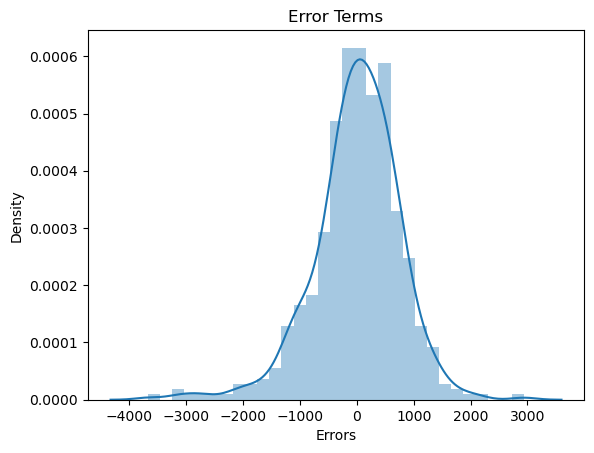

In [55]:
plot_res_dist(y_train, y_train_pred)

#### Errors are normally distribured here with mean 0. So everything seems to be fine

## MODEL IS READY TO USE

In [56]:
# Importing Libraries to calculate r square, train as well as test performance
from sklearn.metrics import r2_score

In [57]:
# R-Square of Test Data
predicted_value = res3.predict(X_test_sm)
print("Test Performance:",round(r2_score(y_test, predicted_value)*100,2),"%")

Test Performance: 81.04 %


In [58]:
# R-Square of Train Data
predicted_value1 = res3.predict(X_train_sm)
print("Train Performance:",round(r2_score(y_train, predicted_value1)*100,2),"%")

Train Performance: 84.65 %


In [59]:
# Calculating Adjusted-R^2 value for the test dataset
adjusted_r2 = round((1 - (1 - r2_score(y_test, predicted_value)) * (X_test.shape[0] - 1) / (X_test.shape[0] - X_test.shape[1] - 1)) * 100, 2)
print(f"Adjusted R-Squared: {adjusted_r2} %")


Adjusted R-Squared: 79.74 %


# **CONCLUSION**

### Analysing the above model, the comapany should focus on the following features:
- Company should focus on expanding business during 'season_2' and 'season_4'.
- Company should focus on expanding business during mnth_8 to mnth_10.
- Based on previous data it is expected to have a boom in number of users once situation comes back to normal, compared to 2019.
- There would be less bookings during Light Snow or Rain, they could probably use this time to serive the bikes without having business impact.

#### Hence when the situation comes back to normal, the company should come up with new offers during season_3 when the weather is pleasant and also advertise a little for mnth_9 as this is when business would be at its best.

### _`Conclusion`_
Significant variables to predict the demand for shared bikes
- holiday
- temp
- hum
- windspeed
- Season
- months(mnth_8, mnth_9, ,mnth_10)
- Year (2019)
- Sunday
- weathersit